In [1]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
#Use SQLAlchemy create_engine to connect to your sqlite database.
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine, inspect, func,Column, Integer, String, Float

import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
#start date June 1 - 15th 2020

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [3]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

session = Session(engine)

results = session.query(\
    Measurement.date,Measurement.prcp).\
    order_by(Measurement.date.desc()).all()
results

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [7]:

q = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= dt.date(2016,8,23)).all()
q


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

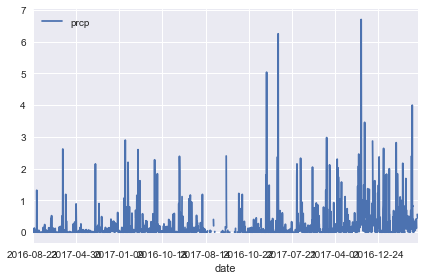

In [9]:
df = pd.DataFrame(q, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

df.plot()
plt.tight_layout()
plt.show()



In [10]:

# Start a session to query the database

#from datetime import datetime, timedelta
#import datetime as dt
#query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(query_date)



#date_str = "2017"
#date_str2 = "2018"
#date_str3 = "08"
#session.query(Measurement.date).\
#    filter(func.strftime("%Y", Measurement.date) >= date_str)\
#    .filter(func.strjnm7ftime("%m", Measurement.date)>= date_str2)\
#    .all()

#Cannot find solution because Measurement.date and dt.date cannot become the same format
#session.query(results).\
#    filter(dt.date(2016, 8, 23)< Measurement.date).\
#    order_by(Measurement.date).all()

In [11]:
# Create Surfer and Board classes
# ----------------------------------
# class Station(Base):
#     __tablename__ = 'hawii_measurements'
#     #id = Column(Integer, primary_key=True)
#     station = Column(String(255),primary_key=True)
#     date = Column(String(255))
#     prcp = Column(Integer)
#     tobs = Column(Integer)

# class Measurement(Base):
#     __tablename__ = 'hawii_stations'
#    # id = Column(Integer, primary_key=True)
#     station = Column(String(255),primary_key=True)
#     name = Column(String(255))
#     latitude = Column(Float(255))
#     longitude = Column(Float(255))
#     elevation = Column(Integer)

In [12]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#Design a query to calculate the total number of stations.
engine.execute('SELECT distinct station FROM station').fetchall()


[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [14]:
combined = engine.execute('SELECT b.station, a.name, b.date, b.prcp, b.tobs, a.latitude, a.longitude, a.elevation FROM measurement b join station a on a.station =  b.station ').fetchall()
combined

[('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-01', 0.08, 65.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-02', 0.0, 63.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-03', 0.0, 74.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-04', 0.0, 76.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-06', None, 73.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-07', 0.06, 70.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-08', 0.0, 64.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-09', 0.0, 68.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-10', 0.0, 73.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-11', 0.01, 64.0, 21.2716, -157.8168, 3.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-12', 0.0, 61.0, 21.2716, -

In [15]:
Base2 = automap_base()
Base2.prepare(engine, reflect=True)
station = Base2.classes.station

# results2 = session.query(\
#     station.station, station.name, station.latitude, station.longitude, station.elevation)\
#     .all()
# results2


In [16]:
import datetime as dt
p = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= dt.date(2016,8,23)).all()
p


[('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397',

In [17]:
df2 = pd.DataFrame(p)
#df.set_index(Measurement.tobs, inplace=True, )
df2.head(10)

,station,tobs
0,USC00519397,81.0
1,USC00519397,79.0
2,USC00519397,80.0
3,USC00519397,79.0
4,USC00519397,77.0
5,USC00519397,78.0
6,USC00519397,78.0
7,USC00519397,79.0
8,USC00519397,80.0
9,USC00519397,81.0


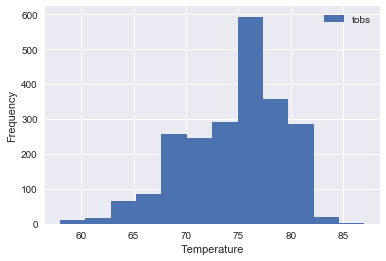

In [18]:
#Plot the results as a histogram with bins=12.
df2.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()



In [ ]:
precip = session.query(Measurement.station, Measurement.prcp).filter(Measurement.date >= dt.date(2016,8,23)).all()
df_precip = pd.DataFrame(precip)
df_precip

In [47]:
active_stations = session.execute('select station, sum(tobs) as "observations" from measurement group by station order by observations desc').fetchall()
df_active_stations = pd.DataFrame(active_stations)
df_active_stations.columns = ['Distinct Stations', 'Observations']
df_active_stations

,Distinct Stations,Observations
0,USC00519397,203083.0
1,USC00519523,198957.0
2,USC00519281,198652.0
3,USC00513117,196915.0
4,USC00516128,185230.0
5,USC00514830,164871.0
6,USC00511918,141728.0
7,USC00517948,102467.0
8,USC00518838,37162.0


In [ ]:
station_total = session.execute('select distinct station as "Unique Stations" from station').fetchall()
df_station_total = pd.DataFrame(station_total)
df_station_total.columns = ['Distinct Stations']
df_station_total

In [49]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route("/")
def welcome():
    return (
        f"/api/v1.0/precipitation"
        f"/api/v1.0/stations"
        f"/api/v1.0/tobs"
        f"/api/v1.0/<start>"
        f"/api/v1.0/<start>/<end>"
    )

@app.route("/api/v1.0/precipitation")
def jsonified():
    return jsonify(df_precip)

@app.route("/api/v1.0/stations")
def distinct_stations():
    return jsonify(df_station_total)

@app.route("/api/v1.0/tobs")
def active_stations():
    return jsonify(df_active_stations)

@app.route("/api/v1.0/<start>")
def temp_start():
    
    
    return jsonify(temp_start)

@app.route("/api/v1.0/<start>/<end>")
def temp_end():
    
    
    return jsonify(temp_end)

if __name__ == "__main__":
    app.run(debug=True, port=0)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:64295/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

,blah
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [ ]:
poo = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= dt.date(2016,8,23)).all()
df3 = pd.DataFrame(poo)
df3